<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/Certificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Certificación

Responder las siguientes preguntas 1 a 4 usando el conjunto de datos dado en el enlace (datos).

* Edad: Representa la edad de cada persona en el conjunto de datos. Es una variable numérica que indica la cantidad de años que ha vivido cada individuo.
* Puntuación: Se refiere a una puntuación o calificación asociada a cada persona en el conjunto de datos. Puede representar el rendimiento en un examen, la satisfacción en una encuesta, o cualquier otra métrica cuantitativa relevante para el contexto.
* Ingresos: Indica el ingreso económico de cada persona en el conjunto de datos. Es una medida numérica del dinero que cada individuo gana en un período específico, como mensual o anualmente.
* Nivel de Educación: Esta variable categoriza el nivel educativo alcanzado por cada persona en el conjunto de datos. Puede incluir categorías como "Licenciatura", "Maestría", "Doctorado", entre otros, representando los diferentes grados académicos obtenidos por los individuos.

## datos.data

In [130]:
from logging import warning
#   cargar datos.data

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Assuming 'datos.data' is a CSV file.  Adjust the separator (sep) if needed.
# For other file types (e.g., Excel), use the appropriate pandas read function.
url_data = 'https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/datos.data'
try:
  df = pd.read_csv(url_data, sep=',') # Replace ',' with the correct separator if needed
  print(df.head()) # Display the first few rows to verify
except FileNotFoundError:
  print("Error: 'datos.data' file not found.")
except pd.errors.ParserError:
  print("Error: Could not parse the file. Check the file format and separator.")

   Edad  Puntuacion  Ingresos Nivel_de_Educacion
0    35          82     50000       Licenciatura
1    28          75     45000           Maestría
2    42          90     60000          Doctorado
3    30          68     48000       Licenciatura
4    39          85     55000           Maestría


In [131]:
df.describe()

,Edad,Puntuacion,Ingresos
count,20.00000,20.000000,20.000000
mean,35.50000,80.400000,52950.000000
std,5.91608,6.953984,5481.788029
min,26.00000,68.000000,44000.000000
25%,30.75000,74.750000,48750.000000
50%,35.50000,80.500000,52500.000000
75%,40.25000,86.250000,57250.000000
max,45.00000,91.000000,62000.000000


In [132]:
#¿Cuál es el promedio de edad en el conjunto de datos?
df.Edad.mean()

35.5

In [133]:
#La columna "puntuación" tiene un valor mínimo en el conjunto de datos de:
df.Puntuacion.min()

68

In [134]:
# ¿Cuántas personas en el conjunto de datos tienen una puntuación superior o igual a 80?
num_people_high_score = len(df[df['Puntuacion'] >= 80])
print(f"Number of people with a score greater than or equal to 80: {num_people_high_score}")

Number of people with a score greater than or equal to 80: 11


In [135]:
df.loc[df.Puntuacion >= 80].count()

,0
Edad,11
Puntuacion,11
Ingresos,11
Nivel_de_Educacion,11


In [136]:
#   ¿Cuál es el nivel de educación más común en el conjunto de datos?

# Find the most common education level
most_common_education = df['Nivel_de_Educacion'].mode()[0]
print(f"The most common education level is: {most_common_education}")

The most common education level is:  Licenciatura


In [137]:
df.Nivel_de_Educacion.value_counts()

,count
Nivel_de_Educacion,
Licenciatura,8
Maestría,6
Doctorado,6


Responder las preguntas 5 A 10 usando los datos proporcionados

En el archivo encontraras las etiquetas <**y_test**>, los scores <**y_score**>  y la etiqueta predicha <**y_pred**> calculados usando un clasificador. Debes responder las siguientes preguntas usando la información contenida en el archivo. Los encabezados del archivo son en el mismo orden: '**Real_Label**'  '**Predicted_Score**'   '**Predicted_label**'

## predicciones_scores.data

In [138]:
#   leer predicciones_scores.data

import pandas as pd

# Assuming 'predicciones_score.data' is a CSV file. Adjust the separator (sep) if needed.
try:
    df = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/predicciones_scores.data', sep=',')  # Replace ',' with the correct separator if needed
    print(df.head())  # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'predicciones_score.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

   Real_Label  Predicted_Score  Predicted_label
0           0         0.156098                0
1           0         0.433585                0
2           1         0.957655                1
3           0         0.281928                0
4           0         0.336131                0


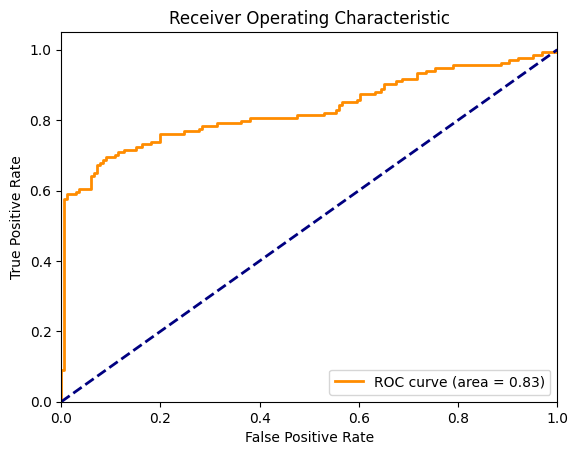

In [139]:
#   Usando los scores proporcionados graficar la curva ROC

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract true labels and predicted scores
y_test = df['Real_Label']
y_score = df['Predicted_Score']

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

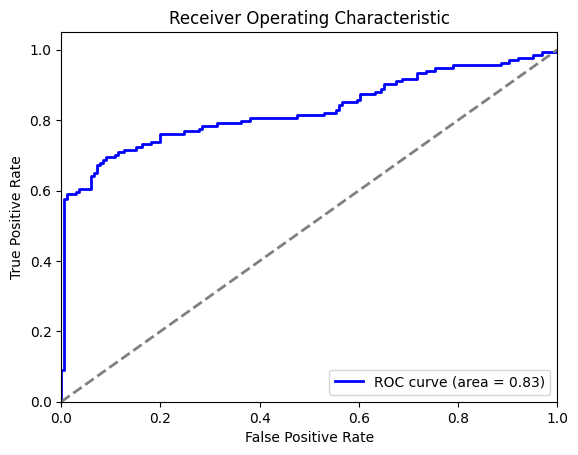

In [140]:
#   graficar la curva ROC con los datos de df

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'df' contains 'y_true' (actual labels) and 'y_score' (predicted probabilities)
# Replace 'y_true' and 'y_score' with the actual column names in your DataFrame

try:
    fpr, tpr, thresholds = roc_curve(df['Real_Label'], df['Predicted_Score']) # Replace with your column names
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'y_true' and 'y_score' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [141]:
#   calcular accuracy con los datos de df

from sklearn.metrics import accuracy_score

# Assuming 'df' contains 'Real_Label' (true labels) and a column with predicted labels
# Replace 'Predicted_Label' with the actual column name in your DataFrame
try:
    accuracy = accuracy_score(df['Real_Label'], df['Predicted_label'])
    print(f"Accuracy: {accuracy}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_Label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Accuracy: 0.8


In [142]:
#   calcular la metrica precision del df

from sklearn.metrics import precision_score

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
try:
    precision = precision_score(df['Real_Label'], df['Predicted_label'])
    print(f"Precision: {precision}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Precision: 0.8936170212765957


In [143]:
#   calcular recall del df

from sklearn.metrics import recall_score

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
try:
    recall = recall_score(df['Real_Label'], df['Predicted_label'])
    print(f"Recall: {recall}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Recall: 0.6268656716417911


In [144]:
#    El clasificador identificó correctamente más de 85% de las instancias de la clase negativa.

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
try:
    # Filter for negative class instances (assuming 0 represents the negative class)
    negative_instances = df[df['Real_Label'] == 0]

    # Count correctly classified negative instances
    correctly_classified_negative = len(negative_instances[negative_instances['Real_Label'] == negative_instances['Predicted_label']])

    # Calculate the percentage of correctly classified negative instances
    percentage_correct_negative = (correctly_classified_negative / len(negative_instances)) * 100

    print(f"Percentage of correctly classified negative instances: {percentage_correct_negative:.2f}%")

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Percentage of correctly classified negative instances: 93.98%


In [145]:
#   calcular especificidad del df

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
from sklearn.metrics import confusion_matrix

try:
    tn, fp, fn, tp = confusion_matrix(df['Real_Label'], df['Predicted_label']).ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity: {specificity}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Specificity: 0.9397590361445783


In [146]:
# El número de falsos negativos es mayor que el de falsos positivos.

try:
    tn, fp, fn, tp = confusion_matrix(df['Real_Label'], df['Predicted_label']).ravel()
    print(f"False Negatives (FN): {fn}")
    print(f"False Positives (FP): {fp}")
    if fn > fp:
        print("Verdadero: El número de falsos negativos es mayor que el de falsos positivos.")
    else:
        print("Falso: El número de falsos negativos no es mayor que el de falsos positivos.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

False Negatives (FN): 50
False Positives (FP): 10
Verdadero: El número de falsos negativos es mayor que el de falsos positivos.


In [147]:
fn > fp

True

#Responder las preguntas 11 A 14 usando los datos proporcionados
El archivo contiene dos conjuntos de datos: train y test. Debe entrenar un clasificador KNN y un modelo de regresión logística para responder las siguientes preguntas.


In [148]:
#   cargar data1.data
import pandas as pd
try:
    df_test = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset3/test_set.csv', sep=',') # Replace ',' with the correct separator if needed
    print(df_test.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'data1.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(300, 3)


In [149]:
#   cargar data1.data
import pandas as pd
try:
    df_train = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset3/train_set.csv', sep=',') # Replace ',' with the correct separator if needed
    print(df_train.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'data1.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(700, 3)


In [150]:
df_train.describe()

,feat1,feat2,target
count,700.000000,700.000000,700.000000
mean,0.498070,-0.121027,0.395714
std,1.113782,0.894658,0.489353
min,-2.869693,-2.587213,0.000000
25%,-0.258868,-0.768702,0.000000
50%,0.474950,-0.207783,0.000000
75%,1.215672,0.475407,1.000000
max,4.495802,2.842864,1.000000


In [151]:
# Los datos tienen igual proporción de registros (instancias) de cada clase. Son cases balanceadas.

df_train.groupby('target').size()

,0
target,
0,423
1,277


In [152]:
#   Debe entrenar un clasificador KNN y un modelo de regresión logística

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Prepare the data for training
X_train = df_train.drop('target', axis=1)  # Features
y_train = df_train['target']  # Target variable
X_test = df_test.drop('target', axis=1)  # Features for testing
y_test = df_test['target']  # Target variable for testing


# Train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

# Train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)  # You may need to adjust max_iter for convergence
logistic_regression.fit(X_train, y_train)
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

KNN Accuracy: 0.9133333333333333
Logistic Regression Accuracy: 0.8


In [153]:
#   Verdadero o Falso - Los datos tienen igual proporción de registros (instancias) de cada clase. Son clases balanceadas.
class_counts = df_train['target'].value_counts()
print(class_counts)

# Check if the classes are balanced (e.g., within 10% of each other)
if class_counts.min() / class_counts.max() > 0.9:
    print("Verdadero: Los datos tienen una proporción similar de registros de cada clase.")
else:
    print("Falso: Los datos no tienen una proporción similar de registros de cada clase.")

target
0    423
1    277
Name: count, dtype: int64
Falso: Los datos no tienen una proporción similar de registros de cada clase.


In [154]:
# Identifica el mejor valor de K - vecinos y su respectivo accuracy para el clasificador KNN entre Un k [3, 5 ,7]

best_k = -1
best_accuracy = -1

# Test different k values
for k in [3, 5, 7]:  # Iterate through your desired k-values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"k = {k}, Accuracy = {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k: {best_k}, Best Accuracy: {best_accuracy}")

k = 3, Accuracy = 0.9233333333333333
k = 5, Accuracy = 0.9133333333333333
k = 7, Accuracy = 0.9166666666666666

Best k: 3, Best Accuracy: 0.9233333333333333


In [155]:
# Usando K=7, el número de falsos positivos es:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_k7 = knn.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_k7).ravel()
print(f"Using K=7, the number of false positives is: {fp}")

Using K=7, the number of false positives is: 8


In [156]:
# Usando un modelo de regresión logística, selecciona los parámetros del modelo que más se aproximen a su estimación. No es necesario normalizar los datos:
# Coeficientes, Intercepto

# Train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", logistic_regression.coef_)
print("Intercept:", logistic_regression.intercept_)

Coefficients: [[-0.32542512  1.43318533]]
Intercept: [-0.12096481]


#Responder las siguientes preguntas 15 a 22  usando los datos del siguiente enlace:


In [157]:
#   cargar data1.data
import pandas as pd
try:
    df = pd.read_csv('/content/datos_FEAT_SEL.data', sep=',') # Replace ',' with the correct separator if needed
    print(df.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'datos_FEAT_SEL.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(10000, 1296)


In [158]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_min,previous_loans_CNT_PAYMENT_sum,previous_loans_NFLAG_LAST_APPL_IN_DAY_mean,client_credit_AMT_INST_MIN_REGULARITY_max_mean,client_credit_SK_DPD_DEF_max_min,client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean,client_credit_AMT_PAYMENT_CURRENT_max_sum,client_installments_AMT_INSTALMENT_mean_sum,client_credit_AMT_DRAWINGS_CURRENT_min_mean,previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9.993000e+03,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,...,1925.000000,9515.000000,9515.000000,2797.000000,2797.000000,2.797000e+03,2.797000e+03,9.532000e+03,2797.000000,9515.000000
mean,0.416300,1.674489e+05,6.007531e+05,27088.010550,5.403851e+05,0.020898,-16025.273100,62821.78480,-4986.483900,-2983.38080,...,0.109091,61.418287,0.997547,7097.791624,0.430819,8.127504e+04,3.294789e+06,6.767073e+05,507.801019,0.083986
std,0.722251,9.422260e+04,4.032643e+05,14384.946154,3.708941e+05,0.013909,4340.528828,140464.31594,3540.591931,1512.51078,...,0.380864,75.359647,0.023459,8525.691828,2.312640,3.727027e+05,6.212823e+06,9.316769e+05,6485.513595,0.200241
min,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.00000,-20981.000000,-6228.00000,...,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000e+00,0.000000e+00,9.450000e-01,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16434.000000,2.385000e+05,0.010006,-19595.250000,-2818.25000,-7491.250000,-4297.00000,...,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.309939e+05,0.000000,0.000000
50%,0.000000,1.440000e+05,5.130000e+05,24970.500000,4.500000e+05,0.018850,-15783.500000,-1224.00000,-4478.000000,-3227.00000,...,0.000000,36.000000,1.000000,4698.450000,0.000000,0.000000e+00,7.100460e+05,3.192946e+05,0.000000,0.000000
75%,1.000000,2.025000e+05,8.100000e+05,34636.500000,6.840000e+05,0.028663,-12388.750000,-286.75000,-2004.000000,-1707.00000,...,0.000000,78.000000,1.000000,9503.190000,0.000000,4.857840e+04,4.387500e+06,8.288479e+05,0.000000,0.000000
max,7.000000,1.935000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.00000,0.000000,0.00000,...,5.000000,1252.000000,1.000000,47344.815000,60.000000,1.446357e+07,1.704000e+08,1.475254e+07,223554.645000,1.000000


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1296 entries, NAME_CONTRACT_TYPE to previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
dtypes: float64(1240), int64(40), object(16)
memory usage: 98.9+ MB


In [160]:
df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_min',
       'previous_loans_CNT_PAYMENT_sum',
       'previous_loans_NFLAG_LAST_APPL_IN_DAY_mean',
       'client_credit_AMT_INST_MIN_REGULARITY_max_mean',
       'client_credit_SK_DPD_DEF_max_min',
       'client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean',
       'client_credit_AMT_PAYMENT_CURRENT_max_sum',
       'client_installments_AMT_INSTALMENT_mean_sum',
       'client_credit_AMT_DRAWINGS_CURRENT_min_mean',
       'previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm'],
      dtype='object', length=1296)

In [161]:
#   FALSO o VERDADERO: La base de datos está balanceada

class_counts = df['TARGET'].value_counts()
print(class_counts)

# Check if the classes are balanced (e.g., within 10% of each other)
if class_counts.min() / class_counts.max() > 0.9:
    print("Verdadero: Los datos tienen una proporción similar de registros de cada clase.")
else:
    print("Falso: Los datos no tienen una proporción similar de registros de cada clase.")

TARGET
0    9225
1     775
Name: count, dtype: int64
Falso: Los datos no tienen una proporción similar de registros de cada clase.


In [162]:
#   El número de variables, sin incluir la variable objetivo, es:
num_variables = len(df.columns) - 1  # Subtract 1 for the target variable
print(f"El número de variables, sin incluir la variable objetivo, es: {num_variables}")

El número de variables, sin incluir la variable objetivo, es: 1295


In [163]:
#   Del dataset '/content/datos_FEAT_SEL.data'
# Separar la columna "TARGET" y eliminar dicha columna del dataframe original.
# Identiifica cuantas varibles existen antes de  aplicar one-hot-ecoding
# Crea una funcion para Aplicar one-hot-ecoding no usar OneHotEncoder separando las variables numericas de las categoricas
# Cuenta el  nuevo número de variables

import pandas as pd
import numpy as np
# Assuming 'df' is your DataFrame loaded from 'datos_FEAT_SEL.data'
try:
    df = pd.read_csv('/content/datos_FEAT_SEL.data', sep=',')
    print(df.shape)
except FileNotFoundError:
    print("Error: 'datos_FEAT_SEL.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

# Separate the target variable
target_variable = df['TARGET']
df = df.drop('TARGET', axis=1)

# Identify the number of variables before one-hot encoding
num_variables_before = len(df.columns)
print(f"Number of variables before one-hot encoding: {num_variables_before}")


def apply_one_hot_encoding(df):
     # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(exclude=np.number).columns

    # Create a new DataFrame to store the encoded features
    encoded_df = pd.DataFrame()

    # Add numerical columns as they are
    encoded_df = pd.concat([encoded_df, df[numerical_cols]], axis=1)


    # Apply one-hot encoding to categorical features
    for col in categorical_cols:
        dummies = pd.get_dummies(df[col], prefix=col)
        encoded_df = pd.concat([encoded_df, dummies], axis=1)

    return encoded_df

# Apply one-hot encoding
encoded_df = apply_one_hot_encoding(df)


# Count the new number of variables
num_variables_after = len(encoded_df.columns)
print(f"Number of variables after one-hot encoding: {num_variables_after}")

(10000, 1296)
Number of variables before one-hot encoding: 1295
Number of variables after one-hot encoding: 1414


In [164]:
#   Calcular la matriz de correlación. Esta matriz mide la correlación entre todos los pares de variables. Debes eliminar una de las variables (de cada par evaluado) cuando el valor absoluto de la correlación supere 0.9. El número de variables resultantes es:

# Assuming 'df' is your DataFrame loaded from 'datos_FEAT_SEL.data'
import pandas as pd
import numpy as np

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Iterate through the correlation matrix
variables_to_remove = set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.9:
      variables_to_remove.add(correlation_matrix.columns[j])

# Remove highly correlated variables
df_filtered = encoded_df.drop(columns=list(variables_to_remove))

# Count the remaining variables
num_remaining_variables = len(df_filtered.columns)
print(f"Number of variables after removing highly correlated ones: {num_remaining_variables}")

Number of variables after removing highly correlated ones: 878


In [165]:
#   Separar la columna "TARGET" y eliminar dicha columna del dataframe original.
# Identiifica cuantas varibles existen antes de  aplicar one-hot-ecoding
# Crea una funcion para Aplicar one-hot-ecoding no usar OneHotEncoder separando las variables numericas de las categoricas
# calcular: matriz de confusión, precision, recall, y AUC (Área bajo la curva ROC). Use la siguiente configuración:
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# # rf_classifier = RandomForestClassifier(random_state=42)
# # xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc


# Assuming 'df' is your DataFrame loaded from 'datos_FEAT_SEL.data'
try:
    df = pd.read_csv('/content/datos_FEAT_SEL.data', sep=',')
    print(df.shape)
except FileNotFoundError:
    print("Error: 'datos_FEAT_SEL.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")


# Separate the target variable
y = df['TARGET']
X = df.drop('TARGET', axis=1)

# Identify the number of variables before one-hot encoding
num_variables_before = len(X.columns)
print(f"Number of variables before one-hot encoding: {num_variables_before}")

def apply_one_hot_encoding(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(exclude=np.number).columns
    encoded_df = pd.DataFrame()
    encoded_df = pd.concat([encoded_df, df[numerical_cols]], axis=1)
    for col in categorical_cols:
        dummies = pd.get_dummies(df[col], prefix=col)
        encoded_df = pd.concat([encoded_df, dummies], axis=1)
    return encoded_df

# Apply one-hot encoding
X = apply_one_hot_encoding(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Train models
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)


xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)


# Evaluate Random Forest
print("\nRandom Forest Results:")
cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:\n", cm)
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))

rf_probs = rf_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr,tpr)
print("AUC:",roc_auc)

# Evaluate XGBoost
print("\nXGBoost Results:")
cm = confusion_matrix(y_test, xgb_predictions)
print("Confusion Matrix:\n", cm)
print("Precision:", precision_score(y_test, xgb_predictions))
print("Recall:", recall_score(y_test, xgb_predictions))

xgb_probs = xgb_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
roc_auc = auc(fpr,tpr)
print("AUC:",roc_auc)

(10000, 1296)
Number of variables before one-hot encoding: 1295

Random Forest Results:
Confusion Matrix:
 [[2768    0]
 [ 232    0]]
Precision: 0.0
Recall: 0.0
AUC: 0.7181512544847518

XGBoost Results:
Confusion Matrix:
 [[2751   17]
 [ 224    8]]
Precision: 0.32
Recall: 0.034482758620689655
AUC: 0.7393876445086706


In [166]:
#   Es correcto afirmar que: El clasificador Random Forest no está prediciendo correctamente ninguna instancia positiva

# Assuming 'rf_predictions' and 'y_test' are defined as in your provided code.

# Check if any positive instances are correctly predicted
correctly_predicted_positive = sum((rf_predictions == 1) & (y_test == 1))

if correctly_predicted_positive == 0:
    print("Verdadero: El clasificador Random Forest no está prediciendo correctamente ninguna instancia positiva.")
else:
    print("Falso: El clasificador Random Forest sí está prediciendo correctamente al menos una instancia positiva.")

Verdadero: El clasificador Random Forest no está prediciendo correctamente ninguna instancia positiva.


In [167]:
#   Es correcto afirmar que: El clasificador XGBoost predice correctamente 225 instancias positivas

# Assuming 'xgb_predictions' and 'y_test' are defined as in your provided code.

# Count correctly predicted positive instances for XGBoost
correctly_predicted_positive_xgb = sum((xgb_predictions == 1) & (y_test == 1))

print(f"Number of correctly predicted positive instances by XGBoost: {correctly_predicted_positive_xgb}")

if correctly_predicted_positive_xgb == 225:
    print("Correcto: El clasificador XGBoost predice correctamente 225 instancias positivas")
else:
    print("Incorrecto: El clasificador XGBoost no predice correctamente 225 instancias positivas")

Number of correctly predicted positive instances by XGBoost: 8
Incorrecto: El clasificador XGBoost no predice correctamente 225 instancias positivas


In [168]:
'''Ojo.  La selección de características, cuando se realiza correctamente, puede mejorar el rendimiento de los modelos. Eliminar variables irrelevantes o redundantes puede reducir el ruido, la complejidad del modelo y el sobreajuste, lo que lleva a una mejor generalización y, en muchos casos, a un mejor rendimiento en diversas métricas.  Perder información *irrelevante* o *redundante* no necesariamente implica una pérdida de información *valiosa*.'''


'Ojo.  La selección de características, cuando se realiza correctamente, puede mejorar el rendimiento de los modelos. Eliminar variables irrelevantes o redundantes puede reducir el ruido, la complejidad del modelo y el sobreajuste, lo que lleva a una mejor generalización y, en muchos casos, a un mejor rendimiento en diversas métricas.  Perder información *irrelevante* o *redundante* no necesariamente implica una pérdida de información *valiosa*.'

In [169]:
#   cargar data1.data
import pandas as pd
try:
    df_data1 = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset5/data1.data', sep=',') # Replace ',' with the correct separator if needed
    print(df_data1.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'data1.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(500, 4)


In [170]:
df_data1.describe()

,Feature1,Feature2,Feature3,Feature4
count,500.000000,500.000000,500.000000,500.000000
mean,-0.903704,0.275838,-4.267405,1.680078
std,4.903881,6.106322,5.396407,6.261005
min,-9.530597,-8.684992,-11.535214,-9.253260
25%,-4.561336,-5.906155,-8.859523,-4.567718
50%,-2.427772,0.661850,-6.324553,2.007162
75%,2.821811,5.052406,-0.647737,7.823278
max,8.968182,12.867018,6.829682,11.853497


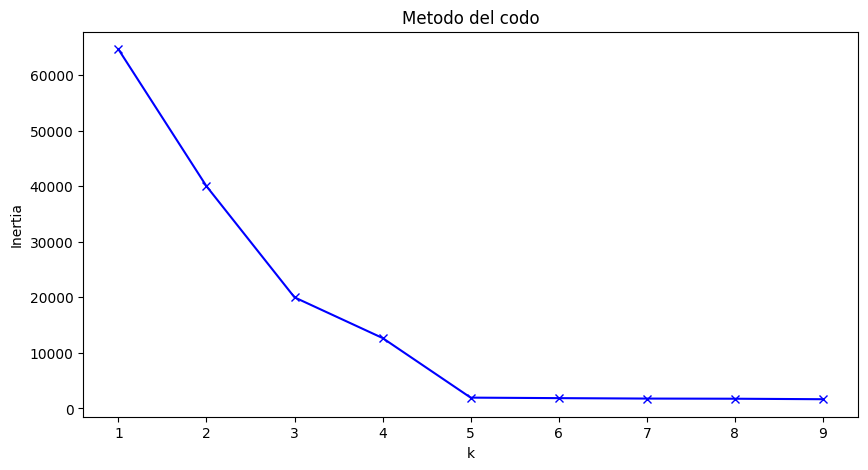

In [171]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)  # Test k values from 1 to 9
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df_data1)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Metodo del codo')
plt.show()

In [172]:
kmeanModel = KMeans(n_clusters=5, random_state=0)
kmeanModel.fit(df_data1)
y_pred = kmeanModel.predict(df_data1)


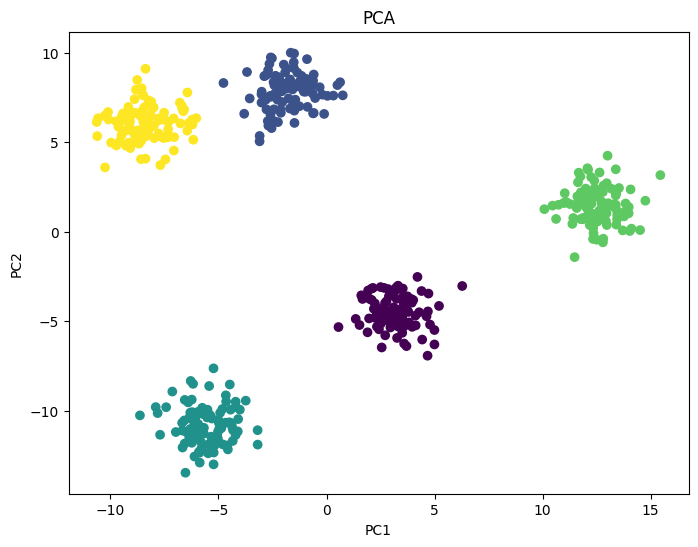

In [173]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_data1)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [174]:
#   Después de aplicar PCA, observa que las dos primeras componentes principales explican más del 60% de la varianza total de los datos. Esto significa que:

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for the first two principal components: {explained_variance_ratio[:2]}")
total_variance_explained = sum(explained_variance_ratio[:2])
print(f"Total variance explained by the first two principal components: {total_variance_explained}")

if total_variance_explained > 0.6:
    print("Verdadero: Las dos primeras componentes principales explican más del 60% de la varianza total.")
else:
    print("Falso: Las dos primeras componentes principales no explican más del 60% de la varianza total.")

Explained variance ratio for the first two principal components: [0.42562774 0.37422988]
Total variance explained by the first two principal components: 0.7998576242084385
Verdadero: Las dos primeras componentes principales explican más del 60% de la varianza total.
